Q. We have to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

## Start Diving into it...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the dataset

In [2]:
Train = pd.read_csv('E:\Study Files\End to End AI\Datasets\Titanic/train.csv')
Test = pd.read_csv("E:\Study Files\End to End AI\Datasets\Titanic/test.csv")

In [3]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Information

* Survival Survived (0 = No, 1 = Yes)

* pclass (Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd)

* Sex (male or female)

* Age(years)

* Sibsp # of siblings / spouses aboard the Titanic

* Parch # of parents / children aboard the Titanic

* Ticket Ticket number

* Fare Passenger fare

* Cabin Cabin number

* Embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Checking the dataset...

Checking the dataset for datatype, missing value etc...

In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Cleaning Dataset...

ACtually dataset contain lot of missing values, unrelated column and also need to applying encoding of text etc.. for specific columns. so, let write some function for that.

In [7]:
def Clean_data(data):
    Sex_dict = {'female':0,"male":1}
    Embarked_dict = {'S':0,'C':1,'Q':2}
    data['Sex'] = data.Sex.map(Sex_dict)
    data['Embarked'] = data.Embarked.map(Embarked_dict)
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] =  data['Age'].fillna(data['Age'].dropna().median())

### Now clean the data by applying the above clean_data function..

In [8]:
Clean_data(Train)
Clean_data(Test)

In [9]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


## Now again Check for missing values...

In [10]:
print('Checking null values in Train data')
Train.isnull().sum()

Checking null values in Train data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print('Checking null values in Test data')
Test.isnull().sum()

Checking null values in Test data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [12]:
drop_column = ['Cabin']
Train.drop(drop_column, axis=1, inplace = True)
Test.drop(drop_column,axis=1,inplace=True)

In [13]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0


In [14]:
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0


<h2> Applying Feature Engineering...

In [16]:
## combine test and train as single to apply some function and applying the feature scaling
All_data=[Train,Test]

<h2> Creating new feature 'Family size'

In [19]:
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in All_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# Creating new feature 'Age'
In this we divide the age column into three age group, children, teenage, adult, elder on basis of thier age division.

In [21]:
## create Range for age features
for dataset in All_data:
    dataset['Age_Range'] = pd.cut(dataset['Age'], bins=[0,12,20,40,100], labels=['Children','Teenage','Adult','Elder'])

## Creating feature "Fare"...

Actually fare may or, may not impact directly on survival but, when we divide the fare into fare range like low_fare, median_fare, Averga_fare, and high_fare then we get little bit idea of a people where it present like in first floor, second floor etc.. when incident occur. Beacuse it's position give higher response time to save himself.

In [23]:
## create RAnge for fare features
for dataset in All_data:
    dataset['Fare_Range'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [24]:
#Avoiding dataloss making a copy of both DataSet start working for copy of dataset
Train_df=Train
Test_df=Test

In [25]:
New_data=[Train_df,Test_df]

In [28]:
for dataset in New_data:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [29]:
#Removing the passenger id from trainning set 
drop_column = ['PassengerId']
Train_df.drop(drop_column, axis=1, inplace = True)

In [30]:
New_data

[     Survived  Pclass  Sex  SibSp  Parch  Embarked  FamilySize Age_Range  \
 0           0       3    1      1      0       0.0           2     Adult   
 1           1       1    0      1      0       1.0           2     Adult   
 2           1       3    0      0      0       0.0           1     Adult   
 3           1       1    0      1      0       0.0           2     Adult   
 4           0       3    1      0      0       0.0           1     Adult   
 ..        ...     ...  ...    ...    ...       ...         ...       ...   
 886         0       2    1      0      0       0.0           1     Adult   
 887         1       1    0      0      0       0.0           1   Teenage   
 888         0       3    0      1      2       0.0           4     Adult   
 889         1       1    1      0      0       1.0           1     Adult   
 890         0       3    1      0      0       2.0           1     Adult   
 
        Fare_Range  
 0        Low_fare  
 1       high_fare  
 2     medi

<h2> As we only cascade the test and train data for applying the feature engeering. We do not mix the train and test data.cascading help in apply feature in single run of code not applying seperately for test and train.And we able to use train and test data sepreatly.

In [31]:
Test_df.head(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Age_Range,Fare_Range
0,892,3,1,0,0,2,1,Adult,Low_fare
1,893,3,0,1,0,0,2,Elder,Low_fare
2,894,2,1,0,0,2,1,Elder,median_fare
3,895,3,1,0,0,0,1,Adult,median_fare
4,896,3,0,1,1,0,3,Adult,median_fare


In [33]:
#Adding the extra feataure in Train data set
Train_df = pd.get_dummies(Train_df, columns = ["Sex","Age_Range","Embarked","Fare_Range"],
                             prefix=["Sex","Age_type","Em_type","Fare_type"])


In [34]:
Train_df.head()

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0.0,Em_type_1.0,Em_type_2.0,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,1,0,2,0,1,0,0,1,0,1,0,0,1,0,0,0
1,1,1,1,0,2,1,0,0,0,1,0,0,1,0,0,0,0,1
2,1,3,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0
3,1,1,1,0,2,1,0,0,0,1,0,1,0,0,0,0,0,1
4,0,3,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0


In [37]:
#Adding the extra feature in test data set
Test_df = pd.get_dummies(Test_df, columns = ["Sex","Age_Range","Embarked","Fare_Range"],
                             prefix=["Sex","Age_type","Em_type","Fare_type"])

In [38]:
Test_df.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0
1,893,3,1,0,2,1,0,0,0,0,1,1,0,0,1,0,0,0
2,894,2,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
3,895,3,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
4,896,3,1,1,3,1,0,0,0,1,0,1,0,0,0,1,0,0


In [39]:
#For precaution let final check the training set...
Train_df.isnull().sum()

Survived                  0
Pclass                    0
SibSp                     0
Parch                     0
FamilySize                0
Sex_0                     0
Sex_1                     0
Age_type_Children         0
Age_type_Teenage          0
Age_type_Adult            0
Age_type_Elder            0
Em_type_0.0               0
Em_type_1.0               0
Em_type_2.0               0
Fare_type_Low_fare        0
Fare_type_median_fare     0
Fare_type_Average_fare    0
Fare_type_high_fare       0
dtype: int64

## Analyze the Correlation between Features...

Now finally merge all the features and understand the correlation between each features....

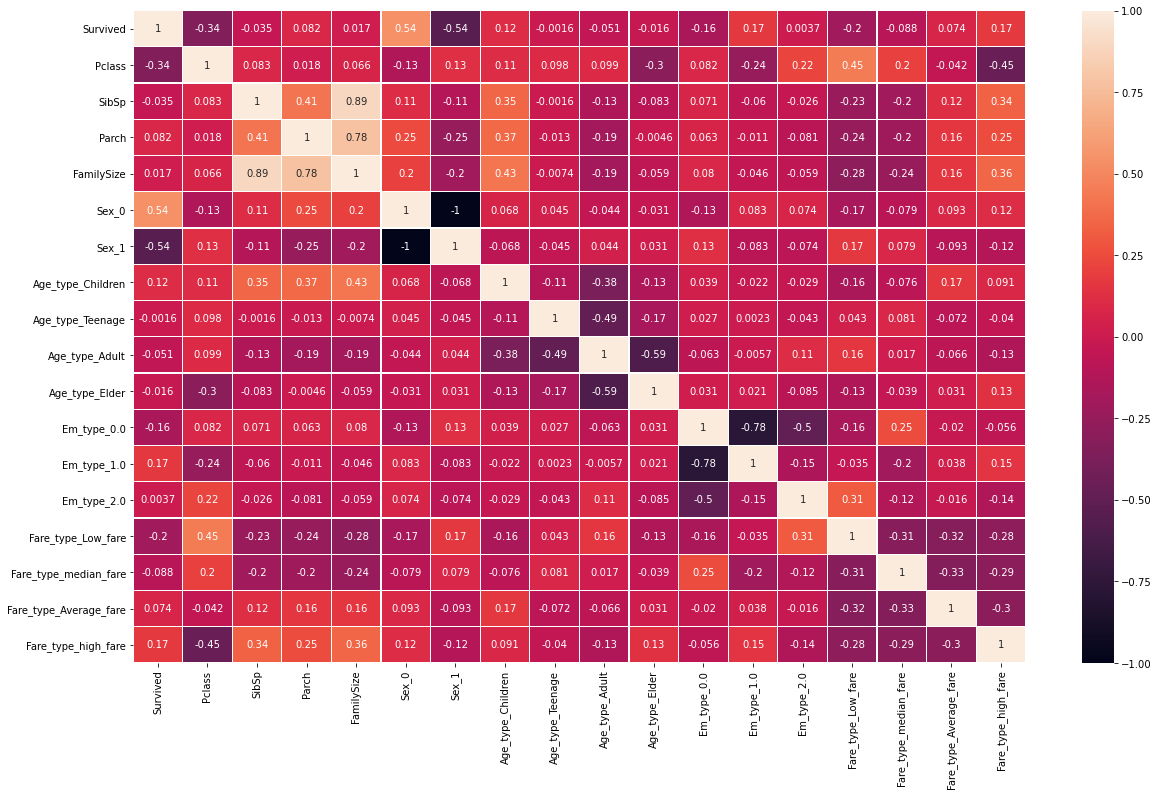

In [41]:
sns.heatmap(Train_df.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

### Selecting Feature from training set to feed to the neural networks

In [43]:
Target = Train_df['Survived'].values
Features = Train_df[['Pclass','SibSp','Parch','FamilySize','Sex_0','Sex_1','Age_type_Children','Age_type_Teenage','Age_type_Adult','Age_type_Elder','Fare_type_Low_fare','Fare_type_median_fare','Fare_type_Average_fare','Fare_type_high_fare']].values

In [47]:
Features.shape

(891, 14)

## Creating the Model...

In [44]:
import keras

In [52]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=14, units=11, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=15, kernel_initializer="uniform"))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation="relu", units=15, kernel_initializer="uniform"))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation="relu", units=15, kernel_initializer="uniform"))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                165       
                                                                 
 dense_7 (Dense)             (None, 15)                180       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_8 (Dense)             (None, 15)                240       
                                                                 
 dropout_4 (Dropout)         (None, 15)                0         
                                                                 
 dense_9 (Dense)             (None, 15)                240       
                                                                 
 dropout_5 (Dropout)         (None, 15)               

In [53]:
Titanic_data =classifier.fit(Features, Target, batch_size = 10, epochs = 100,
    validation_split=0.1,verbose = 1,shuffle=True)

Epoch 1/100
81/81 [==============================] - 1s 4ms/step - loss: 0.6901 - accuracy: 0.5943 - val_loss: 0.6856 - val_accuracy: 0.6222
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6155 - val_loss: 0.6365 - val_accuracy: 0.6222
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6155 - val_loss: 0.5575 - val_accuracy: 0.6222
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.6155 - val_loss: 0.5409 - val_accuracy: 0.6222
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.6192 - val_loss: 0.5153 - val_accuracy: 0.8000
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7853 - val_loss: 0.5057 - val_accuracy: 0.8000
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7990 - val_loss: 0.5052 - val_accuracy: 0.8000
Epoch 8/100
8

Epoch 59/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.8202 - val_loss: 0.4253 - val_accuracy: 0.8556
Epoch 60/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.8177 - val_loss: 0.4349 - val_accuracy: 0.8444
Epoch 61/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.8202 - val_loss: 0.4214 - val_accuracy: 0.8556
Epoch 62/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.8177 - val_loss: 0.4232 - val_accuracy: 0.8333
Epoch 63/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.8165 - val_loss: 0.4202 - val_accuracy: 0.8556
Epoch 64/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8190 - val_loss: 0.4189 - val_accuracy: 0.8444
Epoch 65/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.8177 - val_loss: 0.4248 - val_accuracy: 0.8444
Epoch 

## preparing the test set for prediction...

In [59]:
#drop_column = ['PassengerId','Em_type_0','Em_type_1','Em_type_2']
drop_column = ['Em_type_0','Em_type_1','Em_type_2']
Test_df.drop(drop_column, axis=1, inplace = True)
Test_df.head()

,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,3,0,0,1,0,1,0,0,1,0,1,0,0,0
1,3,1,0,2,1,0,0,0,0,1,1,0,0,0
2,2,0,0,1,0,1,0,0,0,1,0,1,0,0
3,3,0,0,1,0,1,0,0,1,0,0,1,0,0
4,3,1,1,3,1,0,0,0,1,0,0,1,0,0


In [60]:
Test_df.shape

(418, 14)

In [61]:
#predicting the results
Y_pred = classifier.predict(Test_df)

14/14 [==============================] - 0s 1ms/step


In [62]:
Y_pred.dtype

dtype('float32')

In [63]:
#Round off the result for submission
Y_pred=Y_pred.round()
Y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [64]:
Y_pred = pd.DataFrame(Y_pred)

In [65]:
Titanic = pd.merge(Test_df,Y_pred,how = 'left',left_index = True, right_index = True)

In [66]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pclass                  418 non-null    int64  
 1   SibSp                   418 non-null    int64  
 2   Parch                   418 non-null    int64  
 3   FamilySize              418 non-null    int64  
 4   Sex_0                   418 non-null    uint8  
 5   Sex_1                   418 non-null    uint8  
 6   Age_type_Children       418 non-null    uint8  
 7   Age_type_Teenage        418 non-null    uint8  
 8   Age_type_Adult          418 non-null    uint8  
 9   Age_type_Elder          418 non-null    uint8  
 10  Fare_type_Low_fare      418 non-null    uint8  
 11  Fare_type_median_fare   418 non-null    uint8  
 12  Fare_type_Average_fare  418 non-null    uint8  
 13  Fare_type_high_fare     418 non-null    uint8  
 14  0                       418 non-null    fl

In [67]:
Titanic.rename(columns = {0:'Survived-pred'}, inplace = True)

In [68]:
Titanic

,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare,Survived-pred
0,3,0,0,1,0,1,0,0,1,0,1,0,0,0,0.0
1,3,1,0,2,1,0,0,0,0,1,1,0,0,0,0.0
2,2,0,0,1,0,1,0,0,0,1,0,1,0,0,0.0
3,3,0,0,1,0,1,0,0,1,0,0,1,0,0,0.0
4,3,1,1,3,1,0,0,0,1,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,0,0,1,0,0,1,0,0,0.0
414,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1.0
415,3,0,0,1,0,1,0,0,1,0,1,0,0,0,0.0
416,3,0,0,1,0,1,0,0,1,0,0,1,0,0,0.0


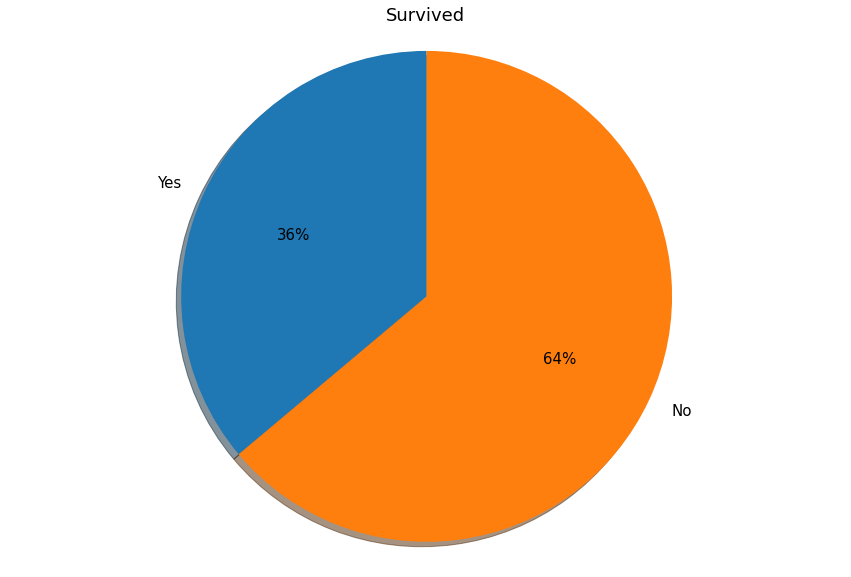

In [69]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(ncols=1,figsize=(15,10))
sizes=[Titanic['Survived-pred'].sum(),len(Titanic)-Titanic['Survived-pred'].sum()]
labels=['Yes','No']
ax.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax.axis('Equal') 
ax.set_title('Survived')
plt.show()

36% of people will survive from Test dataset

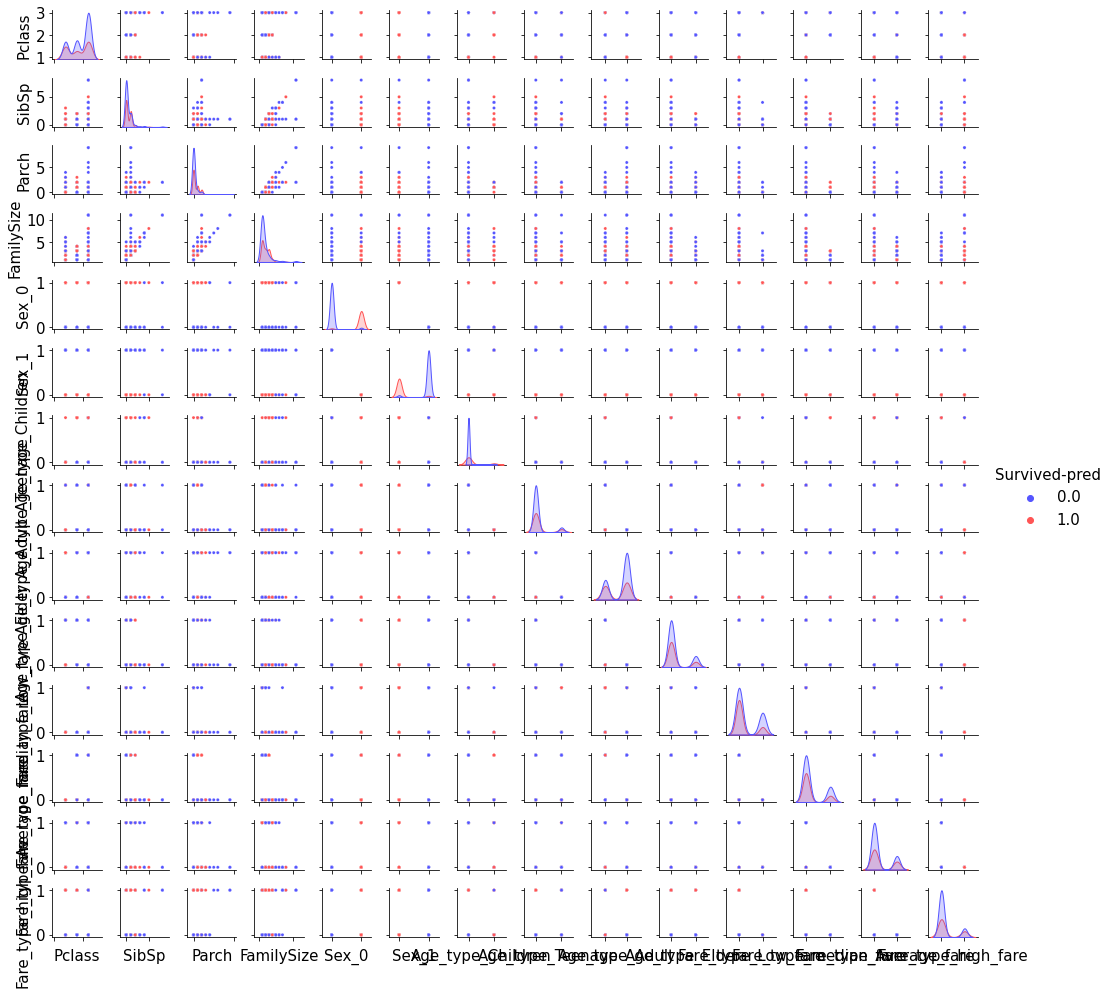

In [71]:
g = sns.pairplot(data=Titanic, hue='Survived-pred', palette = 'seismic',
                 height=1,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

The above graphs can signify which sort of people may surive. The survival can be categorized according to sex(male,Female), Age(Children,Teenage,Adult,Elder), Fare(medium,low,average and high)